In [103]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.font_manager import FontProperties

In [2]:
region = np.genfromtxt('205.csv',delimiter=',').astype(int)
total = np.genfromtxt('total.csv',delimiter=',').astype(int)
region_better = np.genfromtxt('205_better.csv',delimiter=',').astype(int)
total_better = np.genfromtxt('total_better.csv',delimiter=',').astype(int)

In [3]:
style.use('ggplot')

# This plot show that:
# Without sampling by region, label type distribution in a region will change when zoom out
# But if sampling are carried out region by region the distribution is preserved.

In [246]:
label_type_id = np.linspace(1,7,7)
label_type = ['Curb Ramp', 'No Curb Ramp','Obstacle','Suface Problem','Other', 'Occlusion','NoSidewalk']
dumb_label = ['','','','','','','','']
tick_rotation = 20
title_font_size = 30
axes_font_size =24
tick_font_size = 18
ggplot_color=list(plt.rcParams['axes.prop_cycle'])[5]['color']
color_plan = (0,153/255,115/255)
font = {'fontname':'Osaka'}


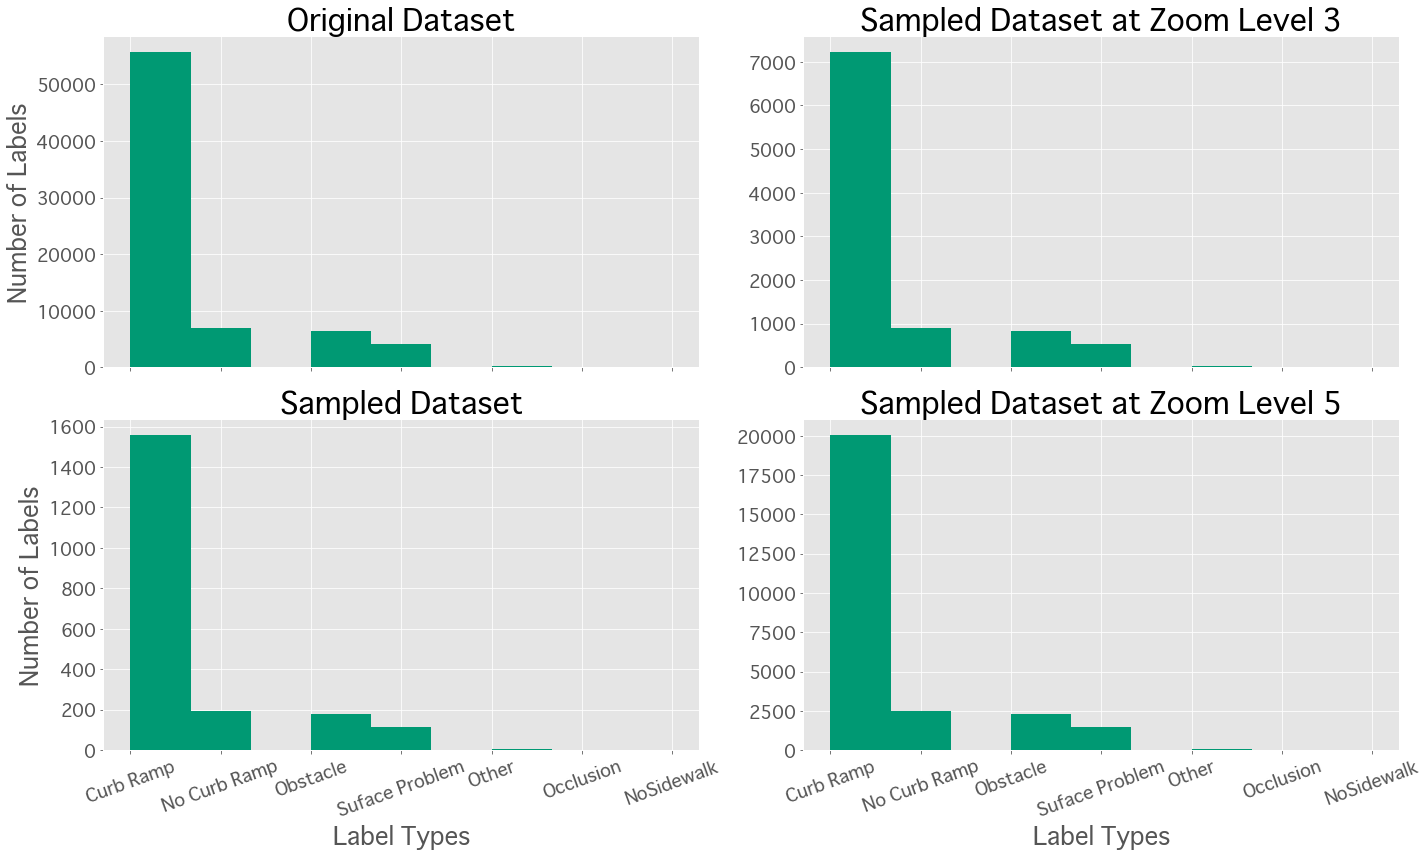

In [254]:
f, ax = plt.subplots(2,2,figsize = (20,12))
ax.flat[0].set_title("Original Dataset",fontsize = title_font_size,**font)
ax.flat[0].hist(label_type_id, 9, weights = total_better[7], color=color_plan)
ax.flat[0].set_ylabel("Number of Labels", fontsize= axes_font_size,**font)
#ax.flat[0].set_xlabel("Type of labels", fontsize= axes_font_size)

ax.flat[1].set_title("Sampled Dataset at Zoom Level 3",fontsize = title_font_size,**font)
ax.flat[1].hist(label_type_id, 9, weights = total_better[3],color=color_plan)
#ax.flat[1].set_ylabel("Number of Labels", fontsize= axes_font_size)
#ax.flat[1].set_xlabel("Type of labels", fontsize= axes_font_size)

ax.flat[2].set_title("Sampled Dataset",fontsize = title_font_size,**font)
ax.flat[2].hist(label_type_id, 9, weights = total_better[0],color=color_plan)
ax.flat[2].set_ylabel("Number of Labels", fontsize= axes_font_size,**font)
ax.flat[2].set_xlabel("Label Types", fontsize= axes_font_size,**font)

ax.flat[3].set_title("Sampled Dataset at Zoom Level 5",fontsize = title_font_size,**font)
ax.flat[3].hist(label_type_id, 9, weights = total_better[5],color=color_plan)
#ax.flat[3].set_ylabel("Number of Labels", fontsize= axes_font_size)
ax.flat[3].set_xlabel("Label Types", fontsize= axes_font_size,**font)
plt.sca(ax[0, 0])
plt.axis
#plt.xticks([])
plt.xticks(label_type_id, dumb_label, rotation =tick_rotation, fontsize = tick_font_size,**font)
plt.yticks(fontsize = tick_font_size,**font)
plt.sca(ax[0, 1])
#plt.xticks([])
plt.xticks(label_type_id, dumb_label, rotation =tick_rotation, fontsize = tick_font_size,**font)
plt.yticks(fontsize = tick_font_size,**font)
plt.sca(ax[1, 0])
plt.xticks(label_type_id, label_type, rotation =tick_rotation, fontsize = tick_font_size,**font)
plt.yticks(fontsize = tick_font_size,**font)
plt.sca(ax[1, 1])
plt.xticks(label_type_id, label_type, rotation =tick_rotation, fontsize = tick_font_size,**font)
plt.yticks(fontsize = tick_font_size,**font)
plt.tight_layout()
plt.show()
plt.savefig('Label_Distribution.png')

In [180]:
height1 = [6500,1780,527.8]
height2 = [18000,5000,99.9]
xlabel_loc = [1.5,4.5,7.5]
xlabels = ['Naive','Sampling Only','Hybrid']

/Users/maomoke/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


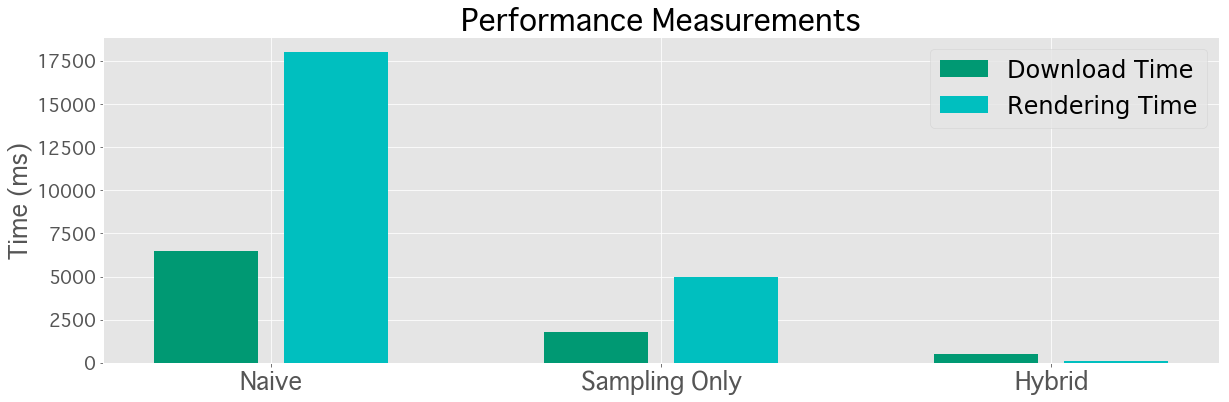

In [255]:
x1 = [1,4,7]
x2 = [2,5,8]
plt.figure(figsize=(20,6))
plt.bar(x1,height1,color= color_plan,label='Download Time')
plt.bar(x2,height2,color= 'c',label = 'Rendering Time')
plt.legend(loc="upper right",fontsize = axes_font_size)
plt.title("Performance Measurements",fontsize = title_font_size,**font)
plt.xticks(xlabel_loc, xlabels, fontsize = axes_font_size,**font)
plt.yticks(fontsize = tick_font_size,**font)
plt.ylabel("Time (ms)",fontsize = axes_font_size,**font)
#plt.ylim(0,7)
plt.savefig('Performance_Comparison.png')
plt.show()

In [183]:
latency_time2 = [960,365,512,866,1150,1780,2430,5310]
latency_time3 = [1670,563,550,434,502,527,220,167]
data_size2 = [864,1331,2253,3584,5939,9933,16486,27341]
data_size3 = [864,1024,730,332,134,66.7,49.3,11.3]
x = np.linspace(0,7,8)

/Users/maomoke/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


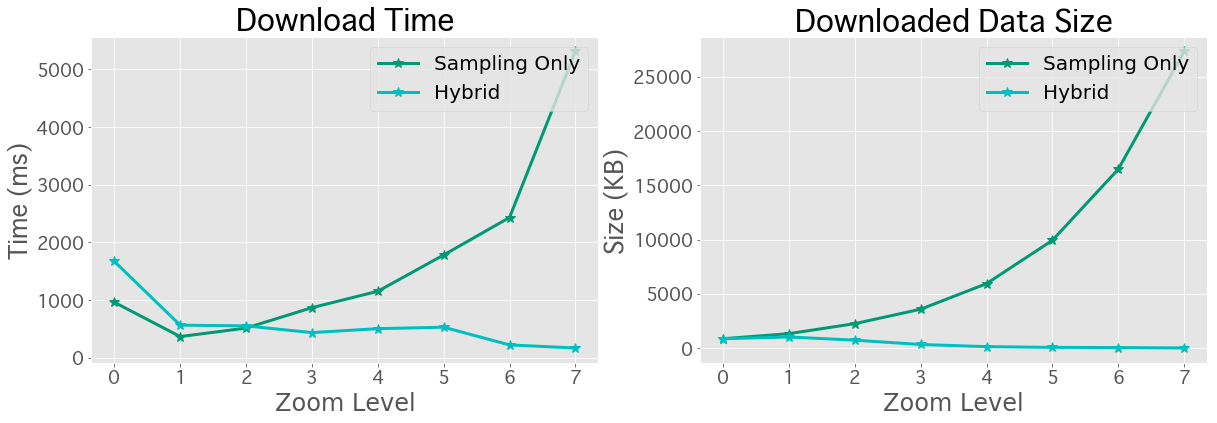

In [259]:
f, ax = plt.subplots(1,2,figsize = (20,6))
ax.flat[0].set_title("Download Time",fontsize = title_font_size,**font)
ax.flat[0].plot(x,latency_time2,marker='*',label = 'Sampling Only',color=color_plan,linewidth = 3,markersize =10)
ax.flat[0].plot(x,latency_time3,marker='*',label = 'Hybrid',color='c',linewidth = 3,markersize =10)
ax.flat[0].set_ylabel("Time (ms)", fontsize= axes_font_size,**font)
ax.flat[0].set_xlabel("Zoom Level", fontsize= axes_font_size)
ax.flat[0].legend(loc="upper right",fontsize =20)

ax.flat[1].set_title("Downloaded Data Size",fontsize = title_font_size,**font)
ax.flat[1].plot(x,data_size2,marker='*', label = 'Sampling Only',color=color_plan,linewidth = 3,markersize =10)
ax.flat[1].plot(x,data_size3,marker='*', label = 'Hybrid',color='c',linewidth = 3,markersize =10)
ax.flat[1].set_ylabel("Size (KB)", fontsize= axes_font_size,**font)
ax.flat[1].set_xlabel("Zoom Level", fontsize= axes_font_size)
ax.flat[1].legend(loc="upper right",fontsize =20)

plt.sca(ax[0])
plt.xticks(fontsize = tick_font_size,**font)
plt.yticks(fontsize = tick_font_size,**font)
plt.sca(ax[1])
plt.xticks(fontsize = tick_font_size,**font)
plt.yticks(fontsize = tick_font_size,**font)
plt.savefig('v2_v3_comparison.png')
plt.show()


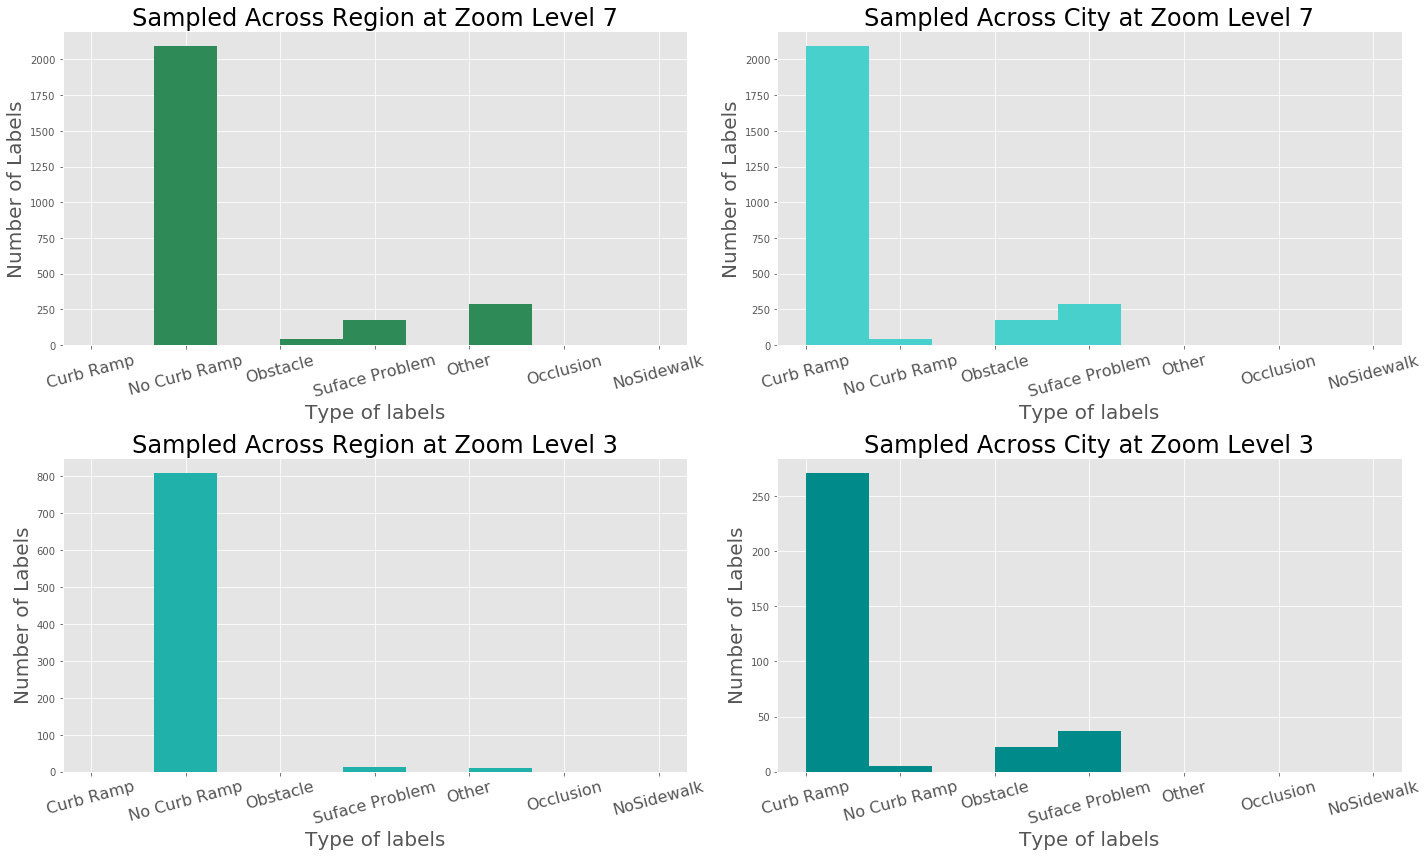

In [79]:
f, ax = plt.subplots(2,2,figsize = (20,12))
ax.flat[0].set_title("Sampled Across Region at Zoom Level 7",fontsize = title_font_size)
ax.flat[0].hist(label_type_id, 9, weights = region[7],color='seagreen')
ax.flat[0].set_ylabel("Number of Labels", fontsize= axes_font_size)
ax.flat[0].set_xlabel("Type of labels", fontsize= axes_font_size)

ax.flat[2].set_title("Sampled Across Region at Zoom Level 3",fontsize = title_font_size)
ax.flat[2].hist(label_type_id, 9, weights = region[3],color= 'lightseagreen')
ax.flat[2].set_ylabel("Number of Labels", fontsize= axes_font_size)
ax.flat[2].set_xlabel("Type of labels", fontsize= axes_font_size)

ax.flat[1].set_title("Sampled Across City at Zoom Level 7",fontsize = title_font_size)
ax.flat[1].hist(label_type_id, 9, weights = region_better[7],color= 'mediumturquoise')
ax.flat[1].set_ylabel("Number of Labels", fontsize= axes_font_size)
ax.flat[1].set_xlabel("Type of labels", fontsize= axes_font_size)

ax.flat[3].set_title("Sampled Across City at Zoom Level 3",fontsize = title_font_size)
ax.flat[3].hist(label_type_id, 9, weights = region_better[3],color= 'darkcyan')
ax.flat[3].set_ylabel("Number of Labels", fontsize= axes_font_size)
ax.flat[3].set_xlabel("Type of labels", fontsize= axes_font_size)
plt.sca(ax[0, 0])
plt.xticks(label_type_id, label_type, rotation =tick_rotation, fontsize = tick_font_size)
plt.sca(ax[0, 1])
plt.xticks(label_type_id, label_type, rotation =tick_rotation, fontsize = tick_font_size)
plt.sca(ax[1, 0])
plt.xticks(label_type_id, label_type, rotation =tick_rotation, fontsize = tick_font_size)
plt.sca(ax[1, 1])
plt.xticks(label_type_id, label_type, rotation =tick_rotation, fontsize = tick_font_size)
plt.tight_layout()
plt.show()
#plt.savefig('Figure1.pdf')

# This plot shows the distribution of label type is preserved in different zoom level

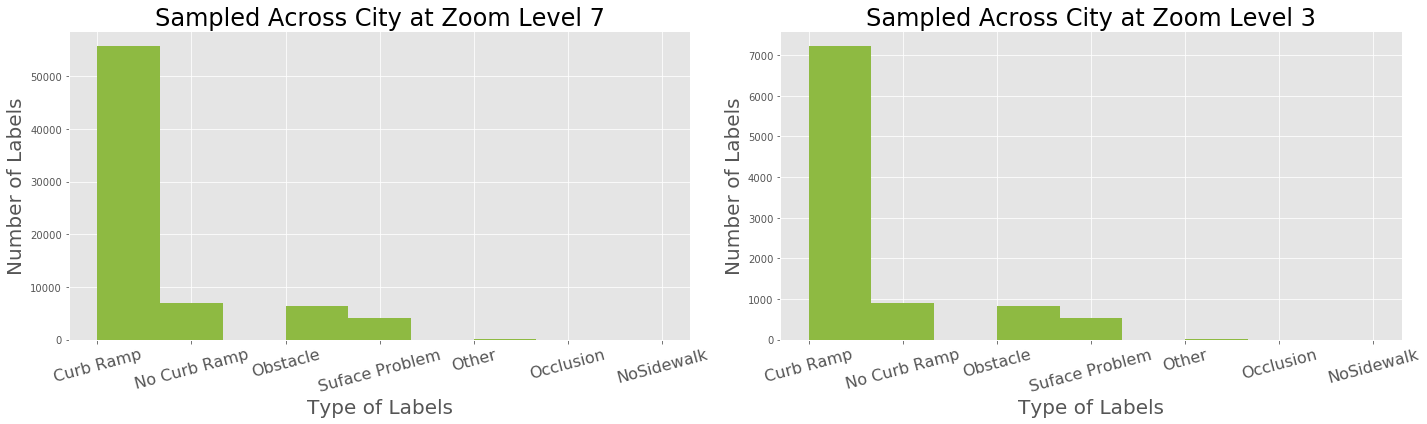

In [78]:
f, ax = plt.subplots(1,2,figsize = (20,6))
ax.flat[0].set_title("Sampled Across City at Zoom Level 7",fontsize = title_font_size)
ax.flat[0].hist(label_type_id, 9, weights = total[7],color=list(plt.rcParams['axes.prop_cycle'])[5]['color'])
ax.flat[0].set_ylabel("Number of Labels",fontsize = axes_font_size)
ax.flat[0].set_xlabel("Type of Labels",fontsize = axes_font_size)

ax.flat[1].set_title("Sampled Across City at Zoom Level 3",fontsize = title_font_size)
ax.flat[1].hist(label_type_id, 9, weights = total[3],color=list(plt.rcParams['axes.prop_cycle'])[5]['color'])
ax.flat[1].set_ylabel("Number of Labels",fontsize = axes_font_size)
ax.flat[1].set_xlabel("Type of Labels",fontsize = axes_font_size)
plt.sca(ax[0])
plt.xticks(label_type_id, label_type, rotation =tick_rotation, fontsize = tick_font_size)
plt.sca(ax[1])
plt.xticks(label_type_id, label_type, rotation =tick_rotation, fontsize = tick_font_size)

plt.tight_layout()
plt.show()
#plt.savefig('Figure2.pdf')

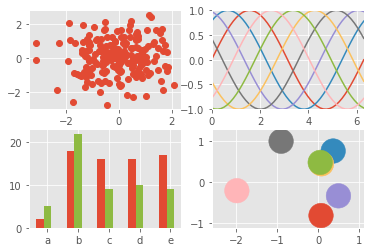

In [50]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, axes = plt.subplots(ncols=2, nrows=2)
ax1, ax2, ax3, ax4 = axes.ravel()

# scatter plot (Note: `plt.scatter` doesn't use default colors)
x, y = np.random.normal(size=(2, 200))
ax1.plot(x, y, 'o')

# sinusoidal lines with colors from default color cycle
L = 2*np.pi
x = np.linspace(0, L)
ncolors = len(plt.rcParams['axes.prop_cycle'])
shift = np.linspace(0, L, ncolors, endpoint=False)
for s in shift:
    ax2.plot(x, np.sin(x + s), '-')
ax2.margins(0)

# bar graphs
x = np.arange(5)
y1, y2 = np.random.randint(1, 25, size=(2, 5))
width = 0.25
ax3.bar(x, y1, width)
ax3.bar(x + width, y2, width,
        color=list(plt.rcParams['axes.prop_cycle'])[5]['color'])
ax3.set_xticks(x + width)
ax3.set_xticklabels(['a', 'b', 'c', 'd', 'e'])

# circles with colors from default color cycle
for i, color in enumerate(plt.rcParams['axes.prop_cycle']):
    xy = np.random.normal(size=2)
    ax4.add_patch(plt.Circle(xy, radius=0.3, color=color['color']))
ax4.axis('equal')
ax4.margins(0)

plt.show()

In [95]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/System/Library/Fonts/SFNSText-MediumItalic.otf',
 '/Library/Fonts/STIXIntDBol.otf',
 '/Library/Fonts/Krungthep.ttf',
 '/Library/Fonts/Mishafi Gold.ttf',
 '/System/Library/Fonts/SFNSText-RegularG3.otf',
 '/Library/Fonts/Arial Italic.ttf',
 '/Library/Fonts/YuppyTC-Regular.otf',
 '/usr/X11R6/lib/X11/fonts/TTF/luximr.ttf',
 '/usr/X11/lib/X11/fonts/TTF/luximri.ttf',
 '/System/Library/Fonts/SFNSText-SemiboldItalic.otf',
 '/Library/Fonts/Trebuchet MS Bold Italic.ttf',
 '/usr/X11/lib/X11/fonts/TTF/Vera.ttf',
 '/Library/Fonts/InaiMathi.ttf',
 '/Users/maomoke/Library/Fonts/EncodeSansWide-100-Thin.ttf',
 '/usr/X11/lib/X11/fonts/OTF/SyrCOMMardinBold.otf',
 '/usr/X11/lib/X11/fonts/TTF/luxirri.ttf',
 '/usr/X11/lib/X11/fonts/TTF/luxisri.ttf',
 '/System/Library/Fonts/SFNSText-HeavyItalic.otf',
 '/usr/X11/lib/X11/fonts/TTF/luximr.ttf',
 '/Library/Fonts/Courier New Bold Italic.ttf',
 '/Library/Fonts/华文仿宋.ttf',
 '/System/Library/Fonts/SFNSDisplay-Thin.otf',
 '/usr/X11R6/lib/X11/fonts/TTF/VeraSe.ttf',


/Users/maomoke/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


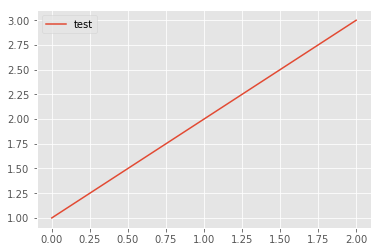

In [102]:
#rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans','Lucida Grande', 'Verdana']
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Lucida Grande']
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([1, 2, 3], label='test')

ax.legend()
plt.show()

/Users/maomoke/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


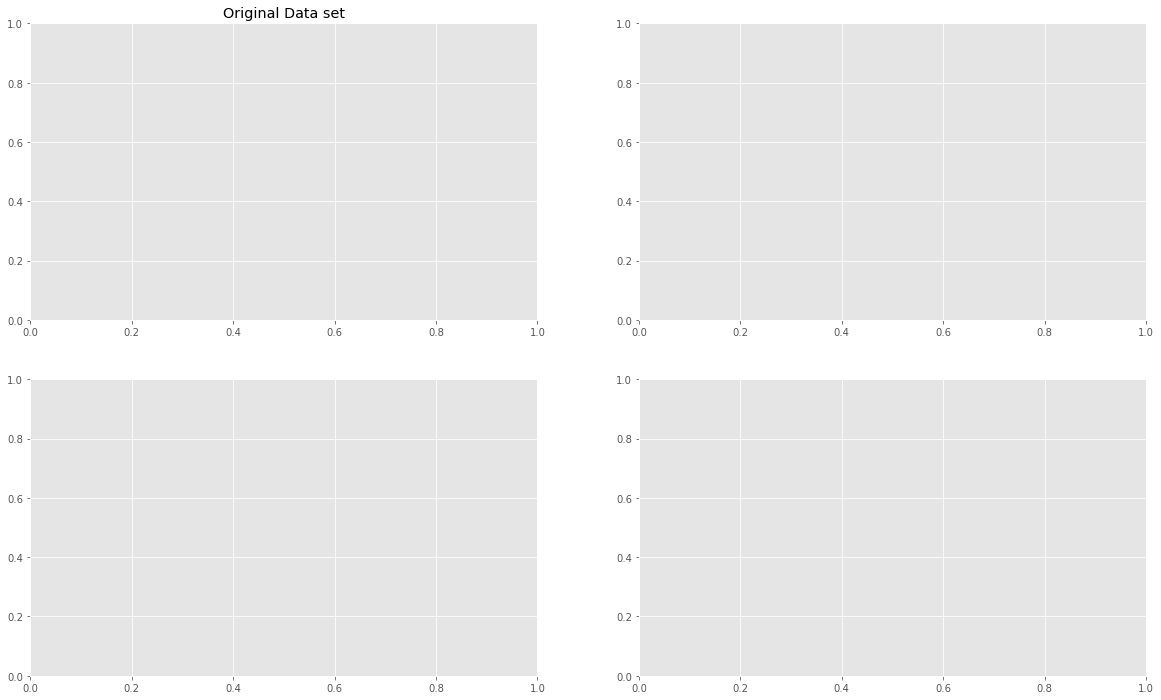

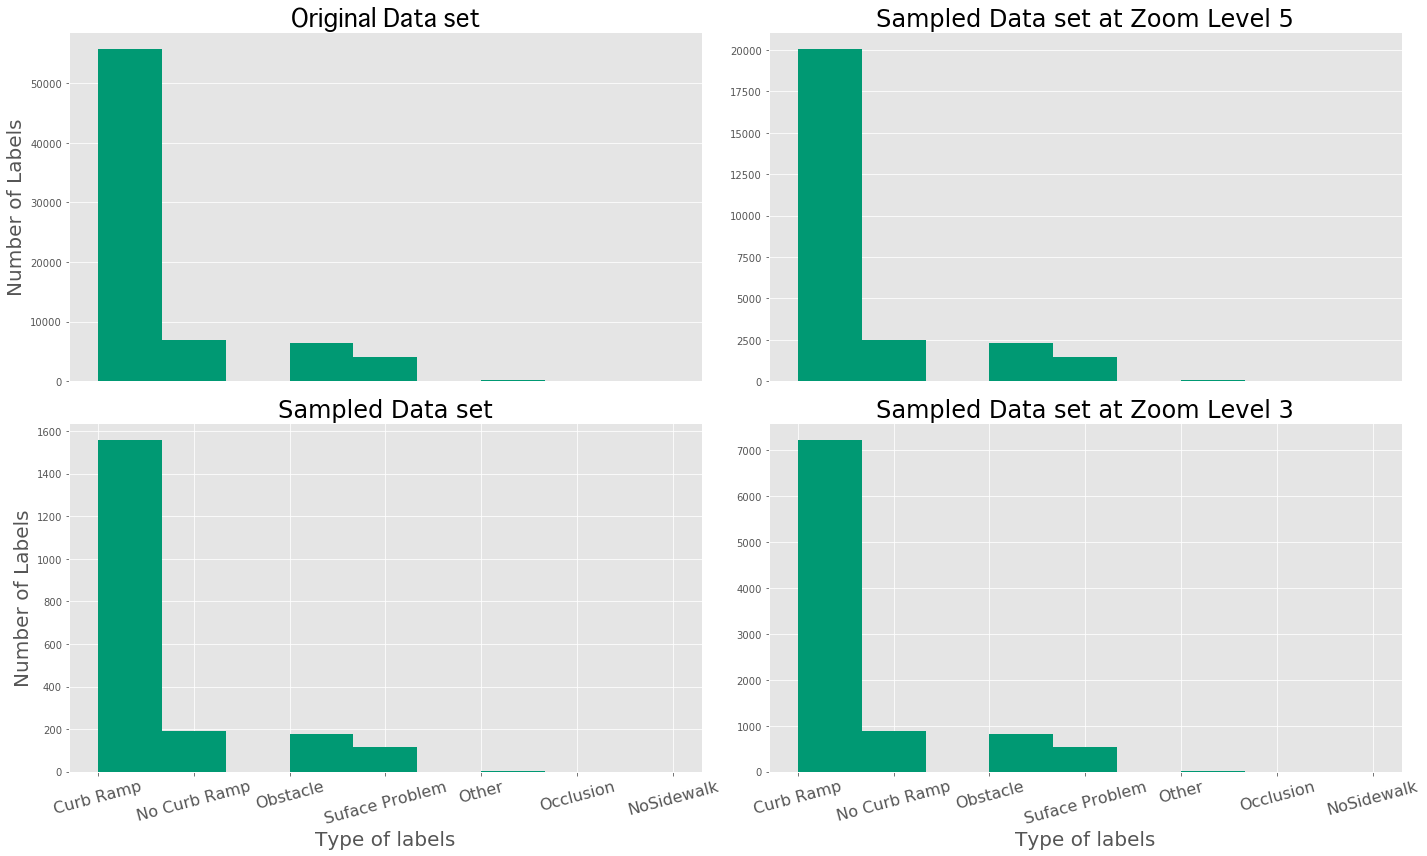

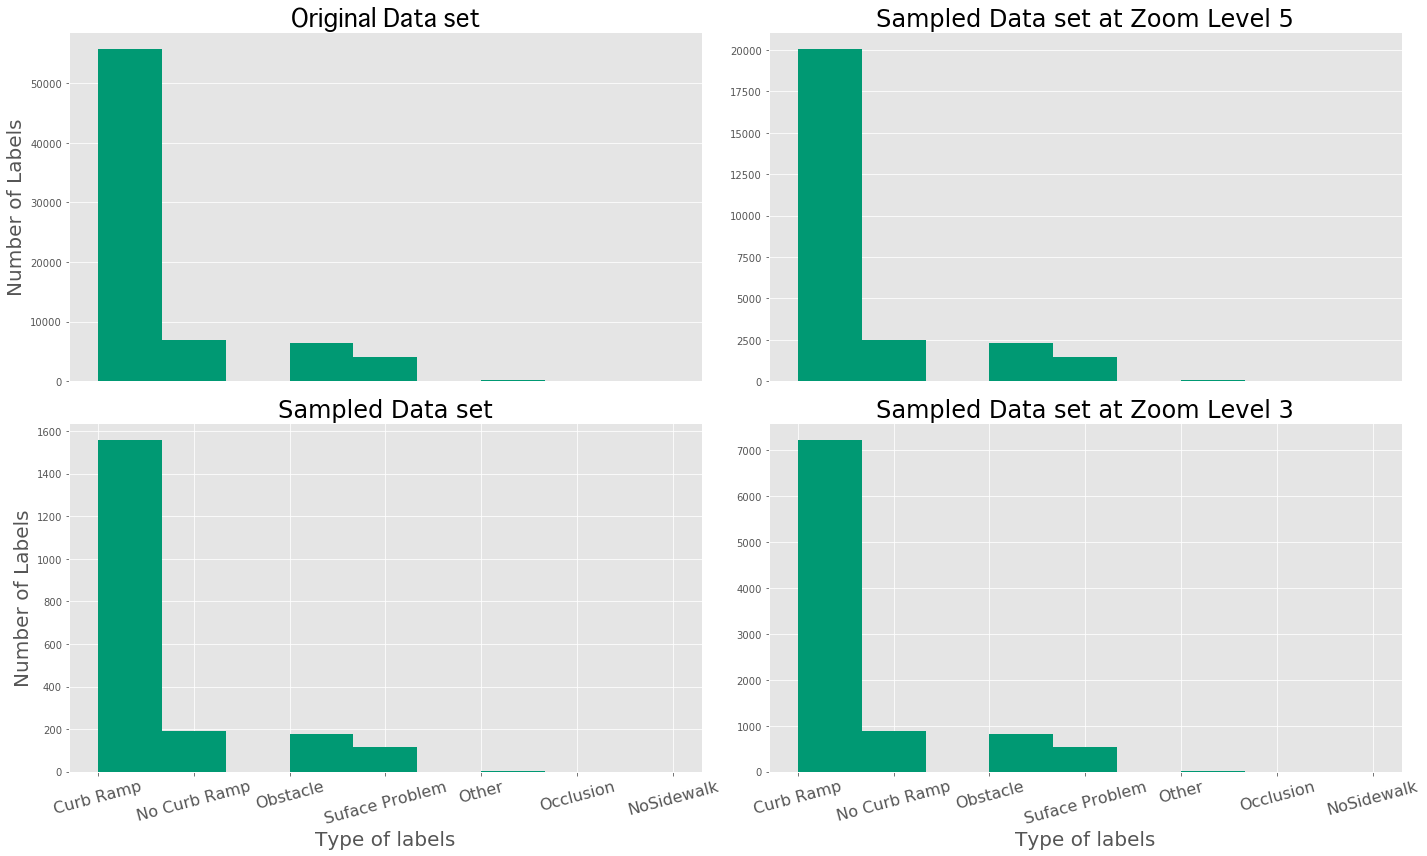

/Users/maomoke/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


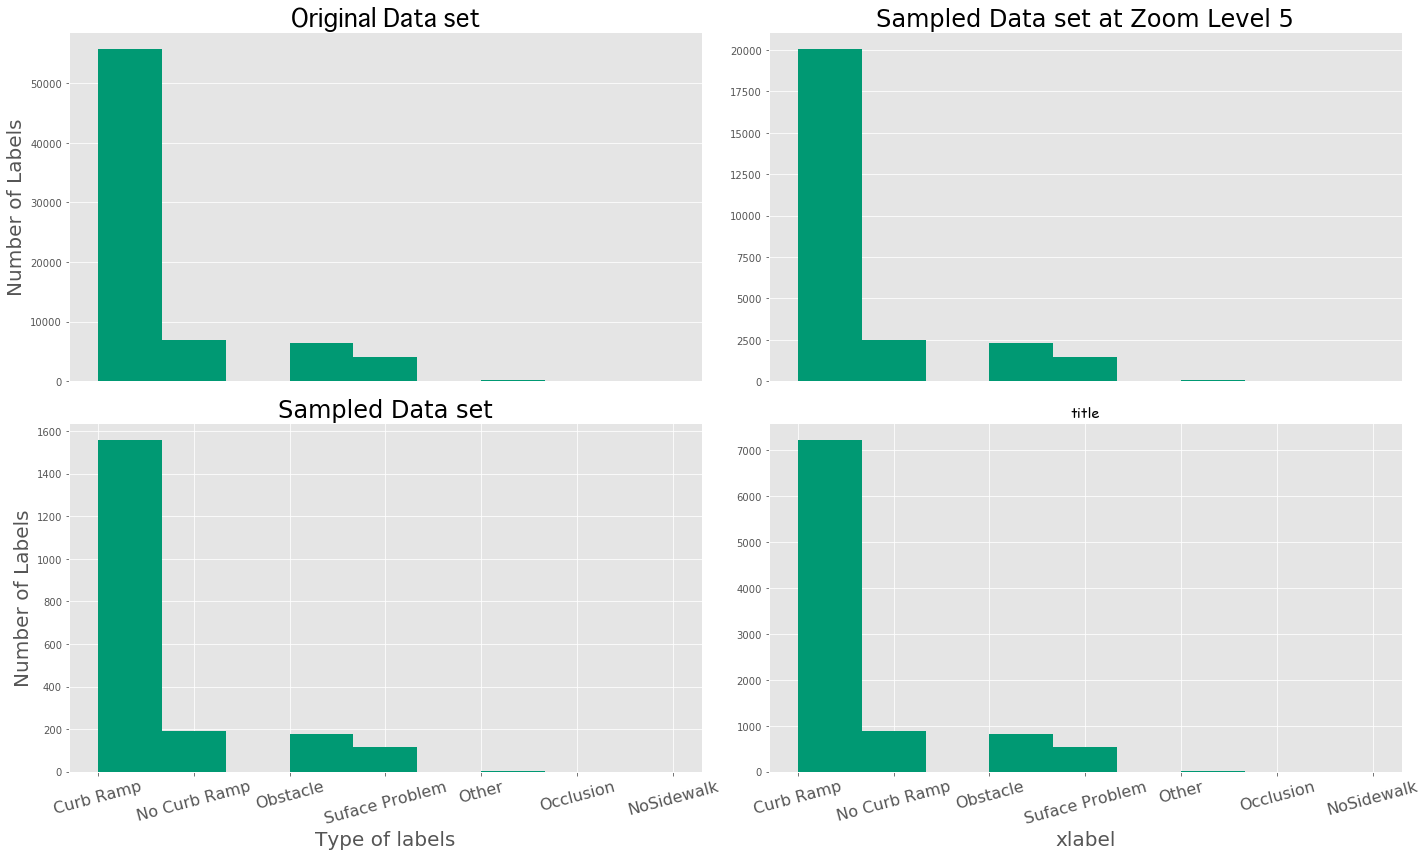

In [111]:
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}

plt.title('title',**csfont)
plt.xlabel('xlabel', **hfont)
plt.show()